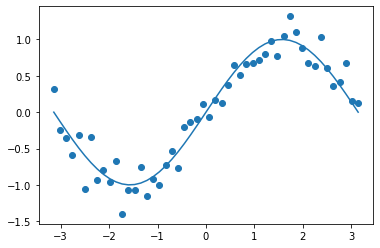

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')


def sin_with_white_noise(x, seed=1):
  """
  mean: mu = 0.0
  variance: sigma^2 = (0.2)^2 = 0.04
  """
  np.random.seed(seed=seed)
  mu = 0.0
  sigma = 0.2
  white_noise = np.random.normal(mu, sigma, len(x))
  return np.sin(x) + white_noise

x = np.linspace(-1, 1) * np.pi
y = sin_with_white_noise(x)
plt.scatter(x, y)
plt.plot(x, np.sin(x))

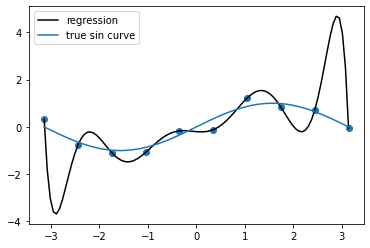

In [5]:
# Regression problem
# Maximal likelihood method

def param_estimator(cfunc, expression, target, ridge=0.0):
  row, column = len(cfunc), len(expression)
  unit_matrix = np.eye(row)
  design_matrix = np.empty([row, column])
  for i, func in enumerate(cfunc):
    for j, x in enumerate(expression):
      design_matrix[i][j] = func(x)

  inverse = np.linalg.inv( design_matrix @ design_matrix.T + ridge * unit_matrix )
  return inverse @ design_matrix @ target


def prediction(cfunc, x, param):
  phi = np.empty([len(cfunc), len(x)])
  for i, func in enumerate(cfunc):
    for j, _x in enumerate(x):
      phi[i][j] = func(_x)

  return param @ phi



N = 10 # Highest order of polynominal 
M = 10 # Number of Data

cfunc = [ (lambda n: lambda x: x ** n)(n) for n in range(M) ]
expression = np.linspace(-1, 1, N) * np.pi
target = sin_with_white_noise(expression)
w = param_estimator(cfunc, expression, target)

x = np.linspace(-1, 1, 100) * np.pi
y = prediction(cfunc, x, w)

plt.plot(x, y, c="black", label="regression")
plt.scatter(expression, target,)
plt.plot(x, np.sin(x), label="true sin curve")
# plt.ylim(-1.2, 1.2)
plt.legend()
plt.show()

正則化項を加えて0次から9次までの多項式でフィッティングを行う。

次数が大きくオーバーフィッティングしているところも正則化項によって振動が抑えられていることがわかる。一方で正則化項が強すぎると予言能力は下がることが見て取れる。

これはモデルの最適な複雑さ（多項式の例では次数）を選ぶことと正則化項の適切なパラメータを選ぶことが本質的には同じことを言っていることを示している。

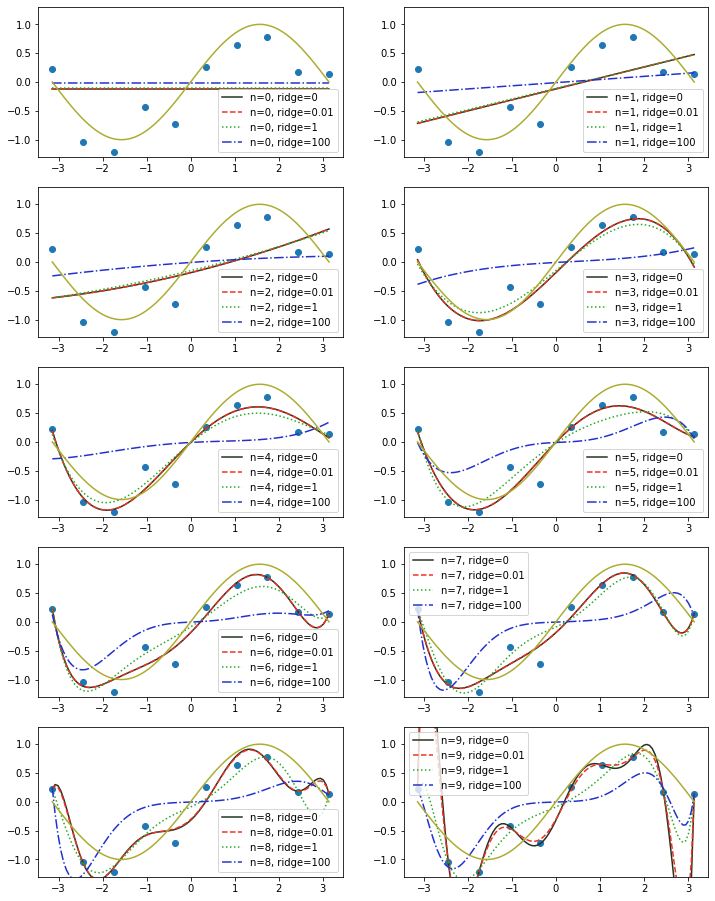

In [6]:
# fitting by polynominal function

model = [i for i in range(10)]
fig = plt.figure(figsize=(12, 16))

for n, order in enumerate(model):
  ax = fig.add_subplot(5, 2, n+1)
  N = 10
  cfunc = [ (lambda n: lambda x: x ** n)(n) for n in range(order+1) ]
  expression = np.linspace(-1, 1, N) * np.pi
  target = sin_with_white_noise(expression, seed=64)

  w = param_estimator(cfunc, expression, target)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#233122", label=f"n={order}, ridge=0")

  ridge = 0.01
  w = param_estimator(cfunc, expression, target, ridge=ridge)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#ed3122", label=f"n={order}, ridge={ridge}", linestyle="dashed")
  ridge = 1
  w = param_estimator(cfunc, expression, target, ridge=ridge)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#23a922", label=f"n={order}, ridge={ridge}", linestyle="dotted")

  ridge = 100
  w = param_estimator(cfunc, expression, target, ridge=ridge)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#2331cc", label=f"n={order}, ridge={ridge}", linestyle="dashdot")

  ax.scatter(expression, target)
  ax.plot(x, np.sin(x), c="#acac31")
  ax.set_ylim(-1.3, 1.3)
  ax.legend()

特徴関数としてガウシアンを選んでフィッティングを行う。
この関数のパラメータは平均$\mu$と分散$\sigma^2$である。
$$
  \phi_i(x) = \exp\Big\{-\frac{1}{2\sigma^{2}}(x - \mu_{i})^2\Big\}
$$
この例もモデルの複雑度を上げると過学習すると大きく振動するが、正則化項によってそれが抑えられていることがわかる。
一方で分散の値が適当だと正則化項がなくても精度良く予言できている（$\sigma=2$のグラフ）。

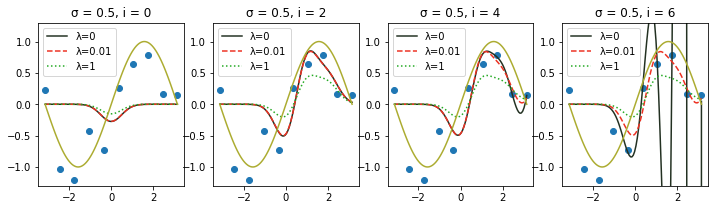

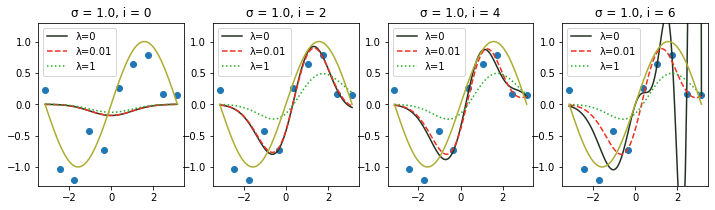

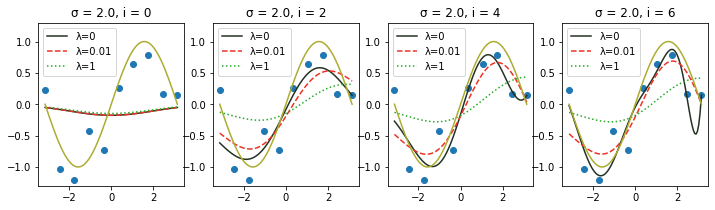

In [7]:
# fitting by Gaussian

model = [0, 1, 2, 3, 4, 5, 6]
var = [0.5, 1.0, 2.0]
# fig = plt.figure(figsize=(12, 16))


N = 10

for m, s in enumerate(var):
  fig = plt.figure(figsize=(12, 3))
  for n, order in enumerate(model):
    pos = n // 2
    if n % 2 == 0:
      ax = fig.add_subplot(1, 4, pos+1)
      cfunc = [ (lambda mu: lambda x: np.exp(-0.5 * s**(-2) * (x - mu) ** 2))(mu) for mu in range(order+1) ]
      expression = np.linspace(-1, 1, N) * np.pi
      target = sin_with_white_noise(expression, seed=64)
      
      w = param_estimator(cfunc, expression, target)
      x = np.linspace(-1, 1, 100) * np.pi
      y = prediction(cfunc, x, w)

      ax.plot(x, y, c="#233122", label=f"λ=0")

      ridge = 0.01
      w = param_estimator(cfunc, expression, target, ridge=ridge)
      x = np.linspace(-1, 1, 100) * np.pi
      y = prediction(cfunc, x, w)

      ax.plot(x, y, c="#ed3122", label=f"λ={ridge}", linestyle="dashed")
      ridge = 1
      w = param_estimator(cfunc, expression, target, ridge=ridge)
      x = np.linspace(-1, 1, 100) * np.pi
      y = prediction(cfunc, x, w)

      ax.plot(x, y, c="#23a922", label=f"λ={ridge}", linestyle="dotted")

      # ridge = 100
      # w = param_estimator(cfunc, expression, target, ridge=ridge)
      # x = np.linspace(-1, 1, 100) * np.pi
      # y = prediction(cfunc, x, w)

      # ax.plot(x, y, c="#2331cc", label=f"λ={ridge}", linestyle="dashdot")

      ax.scatter(expression, target)
      ax.plot(x, np.sin(x), c="#acac31")
      ax.set_ylim(-1.3, 1.3)
      ax.legend()
      ax.set_title(f"σ = {s}, i = {order}")
  
  # plt.show()

# Bayes linear regression

$$
    \def\Normal{\mathcal{N}}
    \def\data{\mathcal{D}}
$$

## Least square method

## Maximal likelihood estimation 

The parameters are determined to maximize the likelihood function
$$
    p(\tau | \chi, w, \beta) = \prod_{n=1}^{N} \Normal(t^{(n)} | w_{i} \phi_{i}(x^{(n)}), \beta^{-1}) 
    = \Big( \frac{\beta}{2\pi} \Big)^{N/2} \exp\Big\{ -\frac{\beta}{2} \sum_{n} (t^{(n)} - w_{i} \phi_{i}(x^{(n)}))^{2} \Big\}
$$
where $\tau = (t^{(1)}, t^{(2)}, \cdots, t^{(N)})$, $\chi = (x^{(1)}, x^{(2)}, \cdots, x^{(N)})$ are sets of the target variable and inputs $x = (x_{0}, x_{1}, \cdots, x_{d})$, $\phi_{i}(x)$ is the arbitrary function that is known the feature function, and $\beta$ is a parameter called precision which is same to the inverse of variance $\sigma^{2}$. 

The maximal likelihood estimation is one way to determine parameters $w_{i}$ due to find the maximal values.
Let us consider the negative log-likelihood function instead of ordinal one for simplicity,
$$
    f(w) \equiv -\ln p(\tau | \chi, w, \beta) = \frac{\beta}{2} \sum_{n} (t^{(n)} - w_{i} \phi_{i}(x^{(n)}))^{2} - \frac{N}{2} \ln \frac{\beta}{2\pi}
$$

## MAP estimation

Bayes theorem say that the posterior probability, which is a probability given the condition, is propotional to the likelihood function and prior probability, which is a probability not given the condition,
$$
    p(w | \tau, \chi, \alpha, \beta) = \frac{p(\tau | w, \chi, \beta) p(w | \chi, \alpha)}{\int d^{P}w p(\tau | w, \chi, \beta) p(w | \chi, \alpha)},
$$
where $P$ is a number of parameters or a dimension of parameter space.

The maximum a posterior (MAP) estimation is achieved to maximize this posterior probability.
In other words, parameters are determined by finding the maximam values of the posterior probability instead of likelihood function (maximal likelihood estimation).
If we assume zero means Gaussian as prior probability, the negative logarhythm of posterior probability is equal to
$$
    -\ln p(\tau | w, \chi, \beta) - \ln p(w | \chi, \alpha)
    = \frac{1}{2} \sum_{n} (t^{(n)} - w_{i} \phi_{i}(x^{(n)}))^{2} + \frac{1}{2} w_{i} w_{i} - \frac{N}{2} \ln \frac{\beta}{2\pi} + \frac{P}{2} \ln(2\pi) - \ln \det \alpha.
$$
$\alpha$ and $\beta$ are hyper-parameter, we focus on first two term. The optimization of this equatioin is so called Ridge regularized least square problem.

## Bayes linear regression

Assuming the Gaussian to the prior probability, the posterior probability is also Gaussian.
Actually,
$$
\begin{aligned}
    p(\tau | w, \chi, \beta) p(w | \chi, \alpha)
    &= \frac{1}{(2\pi)^{(N+P)/2}} \sqrt{\frac{1}{\det\alpha^{-1} \det\beta^{-1}}}
    \exp \Big\{ -\frac{1}{2} (\tau -w_{i}\Phi_{i})^{T} \beta^{-1} (\tau -w_{i}\Phi_{i})
        - \frac{1}{2} (w - m_{0})^{T} \alpha^{-1} (w - m_{0})
    \Big\}
    \\ &= \frac{1}{(2\pi)^{(N+P)/2}} \sqrt{\frac{1}{\det\alpha^{-1} \det\beta^{-1}}}
    \exp \Big\{ 
        - \frac{1}{2} (w - m_{N})^{T} M (w - m_{N})
        - \frac{1}{2} (N^{T} M^{-1} N - \tau^{T} \beta^{-1} \tau - m_{0}^{T} \alpha^{-1} m_{0})
    \Big\}
\end{aligned}
$$
where $\Phi_{i} = (\Phi_{i})_{n} = \phi_{i}(x^{(n)})$ is a design matrix and
$$
\begin{aligned}
    m_{N} \equiv M^{-1} N,
    \quad M \equiv \alpha^{-1} + \Phi^{T} \beta^{-1} \Phi,
    \quad N \equiv \alpha^{-1} m_{0} + \Phi^{T} \beta^{-1} \tau.
\end{aligned}
$$
The normalization factor, $\int d^{D}w p(\tau | w, \chi, \beta) p(w | \chi, \alpha)$, is
$$
    \frac{1}{(2\pi)^{N/2}} \sqrt{\frac{\det M^{-1}}{\det \alpha^{-1} \det \beta^{-1}}}
    \exp\Big\{ -\frac{1}{2} (N^{T} M^{-1} N - \tau^{T} \beta^{-1} \tau - m_{0}^{T} \alpha^{-1} m_{0}) \Big\}
$$
hence the posterior probability is
$$
    p(w | \tau, \chi, \alpha, \beta) = \frac{1}{(2\pi)^{P/2}} \sqrt{\frac{1}{\det M^{-1}}}
    \exp\Big\{ -\frac{1}{2} (w - m_{N})^{T} M (w - m_{N}) \Big\}
    = \Normal(w | m_{N}, M^{-1})
$$


The predictive probability
$$
\begin{aligned}
  p(t \mid x, \tau, \chi, \alpha, \beta) 
  &= \int dw p(t \mid x, w, \beta) p(w \mid \tau, \chi, \alpha, \beta)
  \\ &= \int dw \Normal(t \mid w_{i} \Phi_{i}(x), \beta^{-1}) \Normal(w \mid m_{N}, M^{-1})
  \\ &= \int dw \frac{1}{(2\pi)^{(1+P)/2}} \sqrt{\frac{\beta}{\det M^{-1}}} \exp \Big\{
    -\frac{1}{2} (t - w_{i} \Phi_{i})^{T} \beta (t - w_{i} \Phi_{i})
    - \frac{1}{2} (w - m_{N})^{T} M (w - m_{N})
    \Big\}
\end{aligned}
$$

The expression in exponential is rewritten as follows:
$$
\begin{aligned}
  &(t - m_{N,i} \Phi_{i} - (w - m_{N})_{i} \Phi_{i})^{T} \beta (t - m_{N,i} \Phi_{i} - (w - m_{N})_{i} \Phi_{i}) + (w - m_{N})^{T} M (w - m_{N})
  \\ &= (t - m_{N,i} \Phi_{i})^{T} \beta (t - m_{N,i} \Phi_{i}) - ((w - m_{N})_{i} \Phi_{i})^{T} \beta (t - m_{N,i} \Phi_{i}) - (t - m_{N,i} \Phi_{i})^{T} \beta (w - m_{N})_{i} \Phi_{i} + (w - m_{N})^{T} (M + \Phi \beta \Phi^{T}) (w - m_{N})
  \\ &= (t - m_{N,i} \Phi_{i})^{T} \beta (t - m_{N,i} \Phi_{i}) - (w - m_{N})^{T} \tilde{N} - \tilde{N}^{T} (w - m_{N}) + (w - m_{N})^{T} \tilde{M} (w - m_{N})
  \\ &= (t - m_{N,i} \Phi_{i})^{T} \beta (t - m_{N,i} \Phi_{i}) + (w - m_{N} - \tilde{M}^{-1} \tilde{N})^{T} \tilde{M} (w - m_{N} - \tilde{M}^{-1} \tilde{N}) - \tilde{N}^{T} \tilde{M}^{-1} \tilde{N}
  \\ &= (t - m_{N,i} \Phi_{i})^{T} (\beta - \beta \Phi^{T} \tilde{M}^{-1} \Phi \beta) (t - m_{N,i} \Phi_{i}) + (w - m_{N} - \tilde{M}^{-1} \tilde{N})^{T} \tilde{M} (w - m_{N} - \tilde{M}^{-1} \tilde{N})
\end{aligned}
$$
where $\tilde{N}_{i} = \Phi_{i} \beta (t- m_{N,i} \Phi_{i})$ and $\tilde{M} = M + \Phi \beta \Phi^{T}$.

Doing the integral and apply the Woodbury formula and determinant lemma $\det(A+UWV^{T}) = \det(W^{-1} + V^{T} A^{-1} U) \det A \det W$, we obtain
$$
\begin{aligned}
  p(t \mid x, \tau, \chi, \alpha, \beta)
  &= \frac{1}{(2\pi)^{1/2}} \sqrt{\frac{\beta \det \tilde{M}^{-1}}{\det M^{-1}}} \exp\Big\{-\frac{1}{2} (t - m_{N} \Phi)^{T} (\beta - \beta \Phi^{T} \tilde{M} \Phi \beta) (t - m_{N} \Phi) \Big\}
  \\ &= \frac{1}{(2\pi)^{1/2}} \sqrt{\frac{1}{\det(\beta^{-1} + \Phi^{T} M^{-1} \Phi)}} \exp\Big\{-\frac{1}{2} (t - m_{N} \Phi)^{T} (\beta^{-1} + \Phi^{T} M^{-1} \Phi)^{-1} (t - m_{N} \Phi) \Big\}
  \\ &= \Normal(t \mid m_{N} \Phi, \sigma_{N}^{2}),
\end{aligned}
$$
where $\sigma_{N}^{2} \equiv \beta^{-1} + \Phi^{T} M^{-1} \Phi$.

In [1]:
from dataclasses import dataclass, field

@dataclass
class Train:
    inputs: list = field(default_factory=list)
    targets: list = field(default_factory=list)

train = Train()
train.inputs = [1,2,3]
train

Train(inputs=[1, 2, 3], targets=[])

In [ ]:
class Distribution():
    @classmethod
    def normal(cls, *x, mean=0, cov=1):
        dim = len(x)
        mean = mean * np.ones(dim) if isinstance(mean, (int, float)) else np.array(mean)
        cov = cov * np.eye(dim) if isinstance(cov, (int, float)) else np.array(cov)
        
        # O(N^3) calculation
        det_cov = np.linalg.det(cov)
        inv_cov = np.linalg.inv(cov)

        y = x - mean
        return ( 2.0 * np.pi ) ** (-dim/2) * (det_cov) ** (-1/2) * np.exp( -0.5 * y @ inv_cov @ y )

In [2]:
class Distribution():
    def __init__(self):
        self.__model = None
        self.__param = None

    @property
    def model(self):
        return self.__model

    @model.setter
    def model(self, value):
        self.__model = value

    @property
    def param(self):
        return self.__param

    @param.setter
    def param(self, p):
        self.__param = p

    @property
    def mean(self):
        if self.__model == "gaussian":
            return self.__param["mean"]

    @property
    def cov(self):
        if self.__model == "gaussian":
            return self.__param["cov"]

    def normal(self, *x):
        mean = self.__param.pop("mean")
        cov = self.__param.pop("cov")
        dim = len(x)

        mean = mean * np.ones(dim) if isinstance(mean, (int, float)) else np.array(mean)
        cov = cov * np.eye(dim) if isinstance(cov, (int, float)) else np.array(cov)
        
        det_cov = np.linalg.det(cov)
        inv_cov = np.linalg.inv(cov)

        y = x - mean
        return ( 2.0 * np.pi ) ** (-dim/2) * (det_cov) ** (-1/2) * np.exp( -0.5 * y @ inv_cov @ y )
        


dist = Distribution()
dist.model = "gaussian"
dist.param = {"mean": 0, "cov": 10}
dist.mean, dist.cov


(0, 10)

method: bayesian


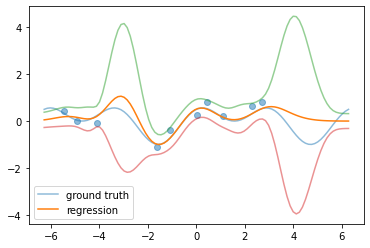

In [33]:
@dataclass
class Inference():
    # __slots__ = ('inference', 'train', '__features', '__design_matrix')
    method: str
    train: Train

    # def __post_init__(self, inference: str, train: Train):
    def __post_init__(self):
        # self.inference = inference
        # self.train = train
        self.__features = None
        self.__design_matrix = None
        self.__likelihood = Distribution()
        self.__prior_distribution = Distribution()

    @property
    def features(self):
        return self.__features

    @features.setter
    def features(self, features):
        self.__features = features
        self.__design_matrix = design_matrix(features, x)

    @property
    def design_matrix(self):
        return self.__design_matrix

    @property
    def likelihood(self):
        return self.__likelihood

    @property
    def prior_distribution(self):
        return self.__prior_distribution


def design_matrix(features, inputs):
    row, column = len(features), len(inputs)
    matrix = np.empty([row, column])
    for i, func in enumerate(features):
        for j, var in enumerate(inputs):
            matrix[i][j] = func(var)

    return matrix


class LinearRegression():
    def __init__(self, inference: Inference, **kwargs):
        self.inference = inference

    def maximal_likelihood(self):
        return self.maximal_posterior(ridge=0)

    def maximal_posterior(self):
        unit_mat = np.eye(len(self.inference.features))
        regulator = self.inference.prior_distribution.cov
        inverse = np.linalg.inv(
            self.inference.design_matrix @ self.inference.design_matrix.T + regulator * unit_mat
        )
        param = inverse @ self.inference.design_matrix @ self.inference.train.targets
        return param

    def bayesian(self):
        unit_mat = np.eye(len(self.inference.features))
        regulator = self.inference.prior_distribution.cov
        beta = self.inference.likelihood.cov
        kern = np.linalg.inv(
            beta * self.inference.design_matrix @ self.inference.design_matrix.T + regulator * unit_mat
        )

        mean = beta * kern @ self.inference.design_matrix @ self.inference.train.targets
        return mean, kern

    def regression(self, x):
        if self.inference.method == 'ml':
            pass

        elif self.inference.method == 'map':
            w_estimated = self.maximal_posterior()
            return w_estimated @ design_matrix(self.inference.features, x)

        elif self.inference.method == 'bayesian':
            mean, kern = self.bayesian()
            predict = mean @ design_matrix(self.inference.features, x)
            variance = np.ones(len(x)) / self.inference.likelihood.cov
            for i, val in enumerate(x):
                variance[i] += design_matrix(self.inference.features, [val]).T @ kern @ design_matrix(self.inference.features, [val])

            return predict, variance

        else:
            raise ValueError("no such value")

    def plot(self, x, y, ubound=None, lbound=None, **kwargs):
        import matplotlib.pyplot as plt
        return plt.plot(x, y)


if __name__ == '__main__':
    import scipy as sp

    np.random.seed(seed=72)
    # x = 2*np.pi*np.linspace(-1, 1)
    x = 2.0 * np.pi * np.sort(2*np.random.rand(10)-1)
    # y = np.sin(x) + np.cos(2*x)
    fn = lambda x: 0.5 * (np.sin(x) + np.cos(2*x))
    y = fn(x)
    plt.scatter(x, y+np.random.normal(0, 0.2, len(x)), alpha=0.5)

    train = Train(targets=y, inputs=x)
    inference = Inference(method='bayesian', train=train)
    print(f"method: {inference.method}")
    # print(f"targets: {inference.train.targets}")
    # print(f"inputs: {inference.train.inputs}")

    inference.likelihood.model = 'gaussian'
    inference.likelihood.param = {"mean": 0, "cov": 10}

    inference.prior_distribution.model = 'gaussian'
    inference.prior_distribution.param = {"mean": 0, "cov": 1}

    # inference.features = [lambda x: 1, lambda x: x, lambda x: x**2, lambda x: np.sin(x), lambda x: np.cos(x)]
    inference.features = [ (lambda n: lambda x: 5*np.exp(-(x-n)**2))(n) for n in range(-5,5) ]
    # print(f"design matrix:\n {inference.design_matrix}")

    rg = LinearRegression(inference=inference)
    x = 2.0 * np.pi * np.linspace(-1, 1, 100)
    # y = rg.regression(x)
    y, var = rg.regression(x)

    plt.plot(x, fn(x), alpha=0.5, label="ground truth")

    plt.plot(x, y, label="regression")
    plt.plot(x, y + np.sqrt(var), alpha=0.5)
    plt.plot(x, y - np.sqrt(var), alpha=0.5)
    # plt.ylim(-5, 5)
    plt.legend()
    plt.show()

In [9]:
np.sort([1,2,0])

array([0, 1, 2])

In [26]:


class BayesianLinearRegression():
    def __init__(self, *, targets, inputs, prior_cov=1, likelifood_cov=1):
        self.__design_matrix = []
        self.__features = []

        self.targets = targets
        self.inputs = inputs
        self.prior_cov = prior_cov
        self.likelifood_cov = likelifood_cov

        self.prior_cov_inv = inv(prior_cov)
        self.likelifood_cov_inv = inv(likelifood_cov)

    @property
    def design_matrix(self):
        return self.__design_matrix

    @design_matrix.setter
    def design_matrix(self, arr):
        self.__design_matrix = arr

    @property
    def features(self):
        return self.__features


    def predictive_probability(self, t, x):
        alpha_inv = inv(self.alpha)
        m = inv(self.alpha) + self.design_matrix.T @ inv(self.beta) @ self.design_matrix
        m_inv = inv(m)
        n = inv(m)
        # for t, x = zip(t, x):
        #     pass
        return 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')


def sin_with_white_noise(x, seed=1):
  """
  mean: mu = 0.0
  variance: sigma^2 = (0.2)^2 = 0.04
  """
  np.random.seed(seed=seed)
  mu = 0.0
  sigma = 0.2
  white_noise = np.random.normal(mu, sigma, len(x))
  return np.sin(x) + white_noise

x = np.linspace(-1, 1) * np.pi
y = sin_with_white_noise(x)

In [2]:
import scipy as sp
from scipy.integrate import quad, nquad
from numpy.linalg import det, inv
import numpy as np

def design_matrix(basis_fn, x):
  """
  phi[i,j] = basis_fn[i](x[j])

  >>> basis = [lambda x: 1, lambda x: x, lambda x: x**2]
  >>> x = [0, 1, 2, 3, 4]
  >>> design_matrix(basis, x)
  [[1, 1, 1, 1, 1],
   [0, 1, 2, 3, 4],
   [0, 1, 4, 9, 16]]
  """
  row, column = len(basis_fn), len(x)
  design_matrix = np.empty([row, column])
  for i, func in enumerate(basis_fn):
    for j, var in enumerate(x):
      design_matrix[i][j] = func(var)

  return design_matrix

# normal = np.random.default_rng().normal
def normal(x, mean=0, cov=1):
  return 1 / (2.0 * np.pi * cov) ** (1/2) * np.exp( -0.5 * cov**(-1) * (x - mean) ** 2 )

def multivariate_normal(*x, mean=0, cov=1):
  dim = len(x)
  mean = mean * np.ones(dim) if isinstance(mean, (int, float)) else np.array(mean)
  cov = cov * np.eye(dim) if isinstance(cov, (int, float)) else np.array(cov)
  
  # O(N^3) calculation
  det_cov = det(cov)
  inv_cov = inv(cov)

  y = x - mean
  return ( 2.0 * np.pi ) ** (-dim/2) * (det_cov) ** (-1/2) * np.exp( -0.5 * y @ inv_cov @ y )



In [3]:
basis = [lambda x: 1, lambda x: x, lambda x: x**2]
x = [0, 1, 2, 3, 4]
design_matrix(basis_fn=basis, x=x)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  4.,  9., 16.]])

In [11]:
nquad(lambda x, y, mu: x*multivariate_normal(x, y, mean=mu), [[-np.inf, np.inf], [-np.inf, np.inf]], args=(4,))

(3.9999999999697975, 4.114469673216834e-08)

In [13]:
from dataclasses import dataclass, field

@dataclass
class Foo():
    # foo: int = 0
    foo: int
    # bar: int = field(default=None)

    def __post_init__(self):
        self.__hoge = ""
        self.__bar = Bar()

    @property
    def hoge(self):
        return self.__hoge

    @hoge.setter
    def hoge(self, string):
        self.__hoge = string

    @property
    def bar(self):
        return self.__bar

class Bar():
    def __init__(self):
        self.__bar = "a"

    @property
    def bar(self):
        return self.__bar

    @bar.setter
    def bar(self, var):
        self.__bar = var

foo = Foo(foo=1)
print(foo.bar.bar)
foo.bar.bar = "e"
print(foo.bar.bar)

a
e


In [ ]:
x = np.linspace(-1, 1, 10)
y = np.sin(x)
regression = Regression(targets=y, inputs=x)
regression.features = [lambda x: 1, lambda x: x, lambda x: x**2, lambda x: x**3]